In [118]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
test=pd.read_csv('datatest.txt',sep=',')

In [120]:
train=pd.read_csv('datatraining.txt',sep=',')

In [121]:
test2=pd.read_csv('datatest2.txt',sep=',')

Working on training data

<img src="info.jpg">

In [122]:
train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [123]:
len(train)

8143

Too many rows for a model to work efficiently

In [124]:
train.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

No null values so not dropping/filling

Checking if Data has values that have high range

In [125]:
train.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


It seems Light and CO2 columns have Max values that deviate large from the mean<br>
Checking the count of such rows.

In [126]:
len(train['CO2'][train.CO2>2000])

41

As 41 values have CO2 field >2000 it is not possible that the set has some faulty CO2 values

In [127]:
len(train['Light'][train.Light>700])

6

As light has only 6 values above 700 ,they maybe faulty so dropping that entire row containing train.light>700

In [128]:
train.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [129]:
test

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
145,2015-02-02 14:23:59,23.760000,26.260000,568.666667,790.000000,0.004779,1
146,2015-02-02 14:25:00,23.730000,26.290000,536.333333,798.000000,0.004776,1
147,2015-02-02 14:25:59,23.754000,26.290000,509.000000,797.000000,0.004783,1
148,2015-02-02 14:26:59,23.754000,26.350000,476.000000,803.200000,0.004794,1
149,2015-02-02 14:28:00,23.736000,26.390000,510.000000,809.000000,0.004796,1


Correcting the indexing of train database

In [131]:
train.index=range(len(train))

In [132]:
count=0
for i in range(len(train)):
    if train.loc[i,'Light']<100 and train.loc[i,'Occupancy']==1 :
        count=count+1
print(count)

1


Since there is only one observation it is safe to say that occupancy is always zero if light is <100.

Plotting the variation of Occupancy with Light

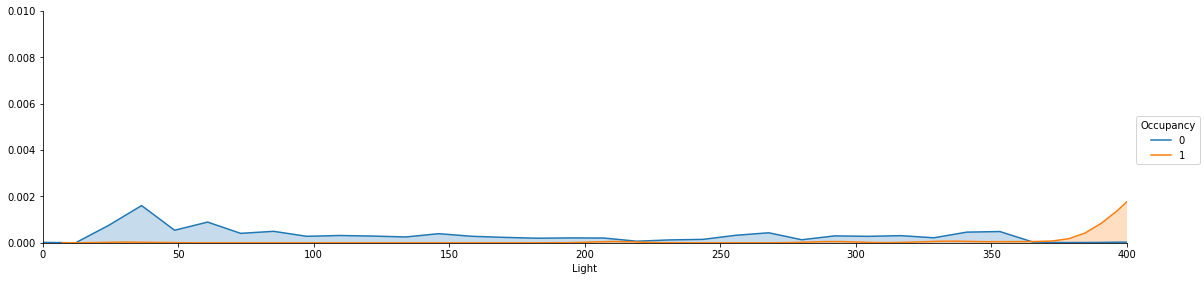

In [133]:
grid=sns.FacetGrid(train,hue='Occupancy',aspect=4,size=4)
grid.map(sns.kdeplot,'Light',shade=True)
plt.xlim(0,400)
plt.ylim(0,0.01)
grid.add_legend()

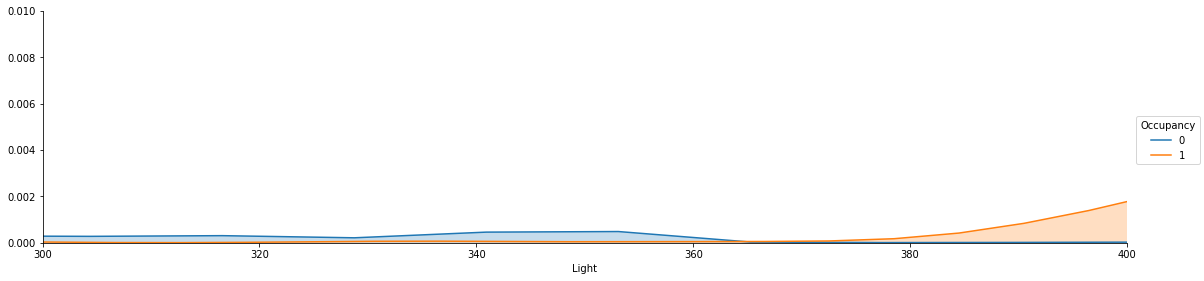

In [134]:
grid=sns.FacetGrid(train,hue='Occupancy',aspect=4,size=4)
grid.map(sns.kdeplot,'Light',shade=True)
plt.xlim(300,400)
plt.ylim(0,0.01)
grid.add_legend()

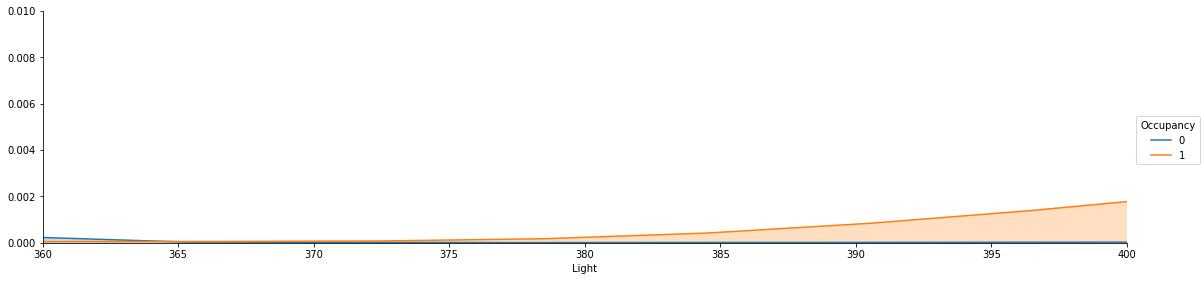

In [135]:
grid=sns.FacetGrid(train,hue='Occupancy',aspect=4,size=4)
grid.map(sns.kdeplot,'Light',shade=True)
plt.xlim(360,400)
plt.ylim(0,0.01)
grid.add_legend()

So we see that at 370 occupancy seems to dominate

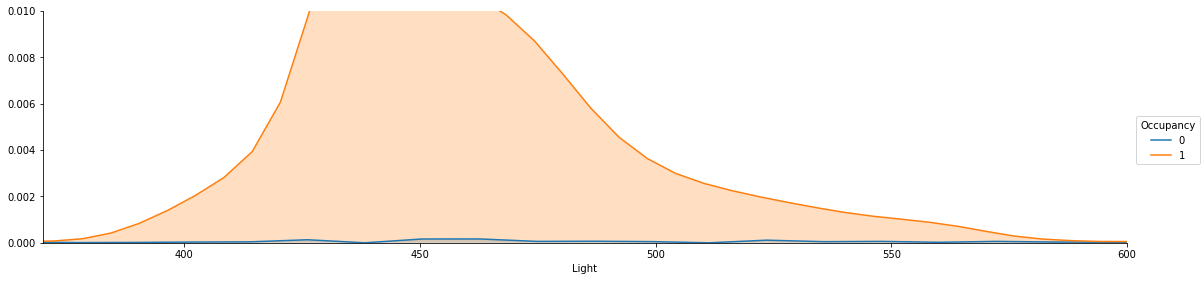

In [136]:
grid=sns.FacetGrid(train,hue='Occupancy',aspect=4,size=4)
grid.map(sns.kdeplot,'Light',shade=True)
plt.xlim(370,600)
plt.ylim(0,0.01)
grid.add_legend()

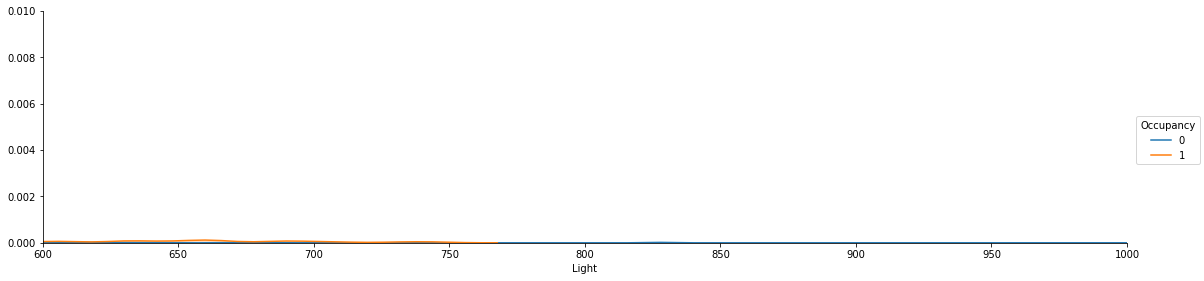

In [137]:
grid=sns.FacetGrid(train,hue='Occupancy',aspect=4,size=4)
grid.map(sns.kdeplot,'Light',shade=True)
plt.xlim(600,1000)
plt.ylim(0,0.01)
grid.add_legend()

In [138]:
count=0
for i in range(len(train)):
    if train.loc[i,'Light']>600 and train.loc[i,'Occupancy']==1 :
        count=count+1
print(count)

16


In [139]:
count=0
for i in range(len(train)):
    if train.loc[i,'Light']>700 and train.loc[i,'Occupancy']==1 :
        count=count+1
print(count)

3


Now Seeing the Variation with Second Strong Feature CO2

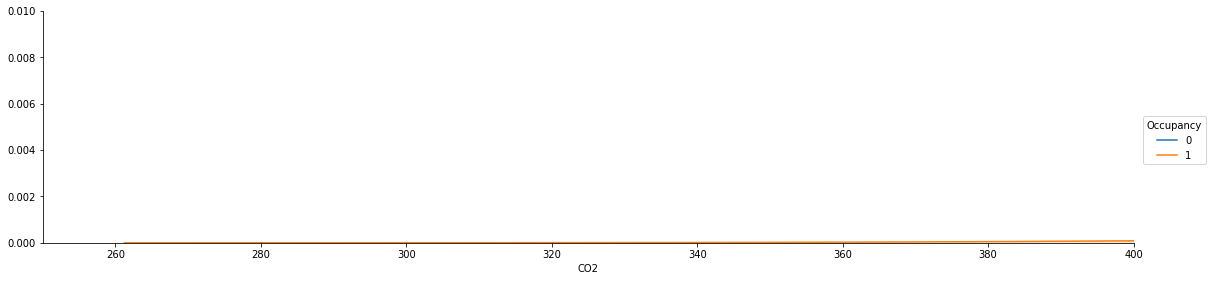

In [140]:
grid=sns.FacetGrid(train,hue='Occupancy',aspect=4,size=4)
grid.map(sns.kdeplot,'CO2',shade=True)
plt.xlim(250,400)
plt.ylim(0,0.01)
grid.add_legend()

In [141]:
train.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


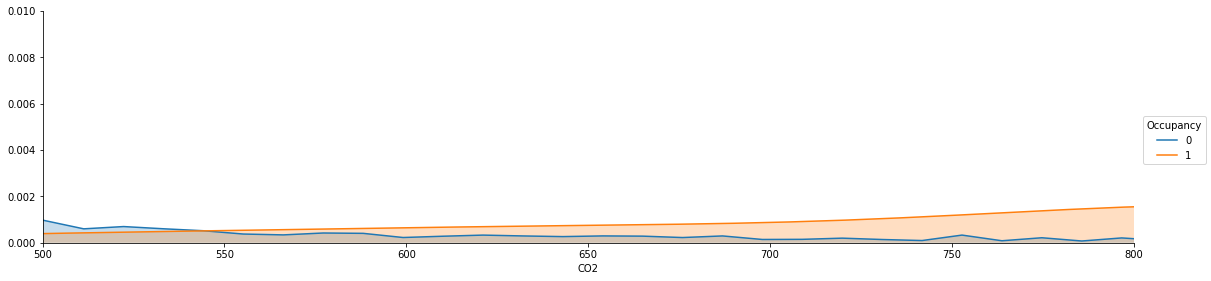

In [142]:
grid=sns.FacetGrid(train,hue='Occupancy',aspect=4,size=4)
grid.map(sns.kdeplot,'CO2',shade=True)
plt.xlim(500,800)
plt.ylim(0,0.01)
grid.add_legend()

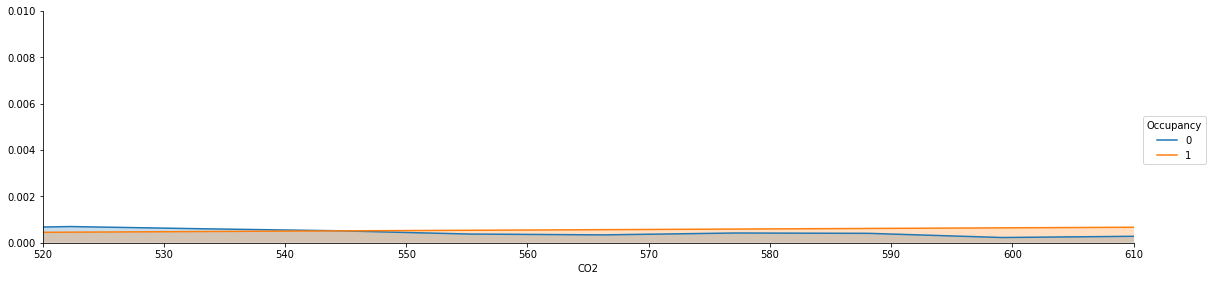

In [143]:
grid=sns.FacetGrid(train,hue='Occupancy',aspect=4,size=4)
grid.map(sns.kdeplot,'CO2',shade=True)
plt.xlim(520,610)
plt.ylim(0,0.01)
grid.add_legend()

So above 550 as CO2 levels increase occupancy also increases<br>
But it may happen that CO2 and light have a high correlation between them!!
<br>Checking if that is the case


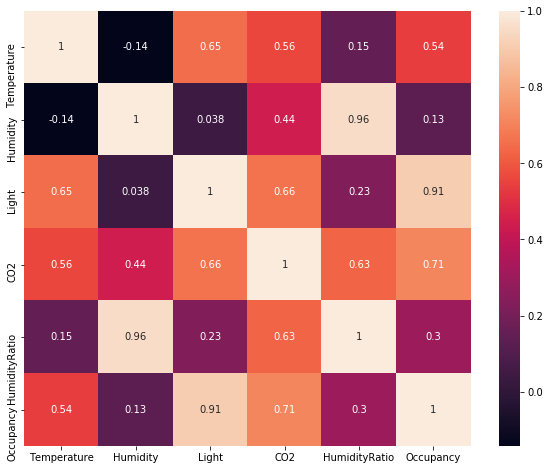

In [144]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True)
plt.show()

We find that humidity and humidity ratio have a high correlation between them and they hardly affect occupancy.<br>
So before testing I will drop both the columns ie(['humidity','humidity ratio'])

So total number of our features=3 ie(['Light','CO2','Temperature'])

Checking the Last Feature Temperature

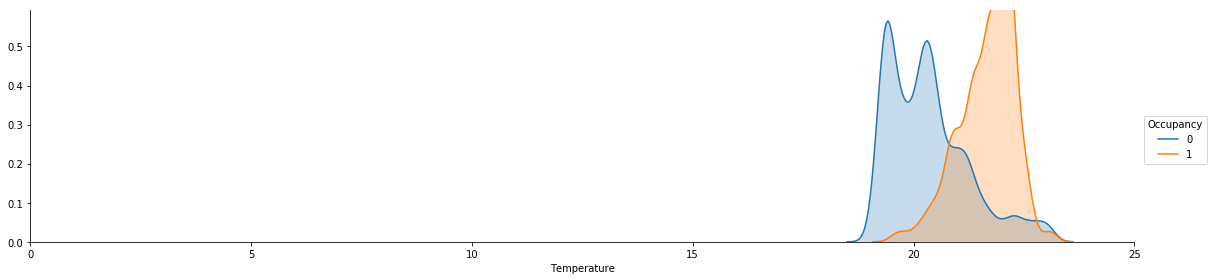

In [145]:
grid=sns.FacetGrid(train,hue='Occupancy',aspect=4,size=4)
grid.map(sns.kdeplot,'Temperature',shade=True)
plt.xlim(0,25)

grid.add_legend()

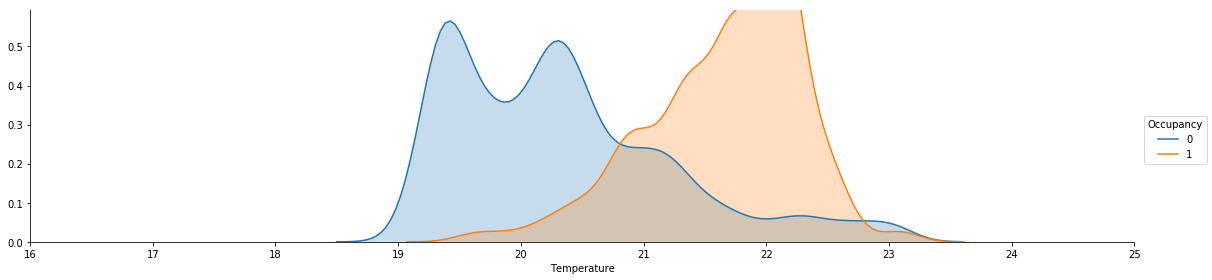

In [146]:
grid=sns.FacetGrid(train,hue='Occupancy',aspect=4,size=4)
grid.map(sns.kdeplot,'Temperature',shade=True)
plt.xlim(16,25)

grid.add_legend()

In [147]:
count=0
for i in range(len(train)):
    if train.loc[i,'Temperature']<18 and train.loc[i,'Occupancy']==1 :
        count=count+1
print(count)

0


In [148]:
count=0
for i in range(len(train)):
    if train.loc[i,'Temperature']<20 and train.loc[i,'Occupancy']==1 :
        count=count+1
print(count)

23


Making Maps for Each Feature

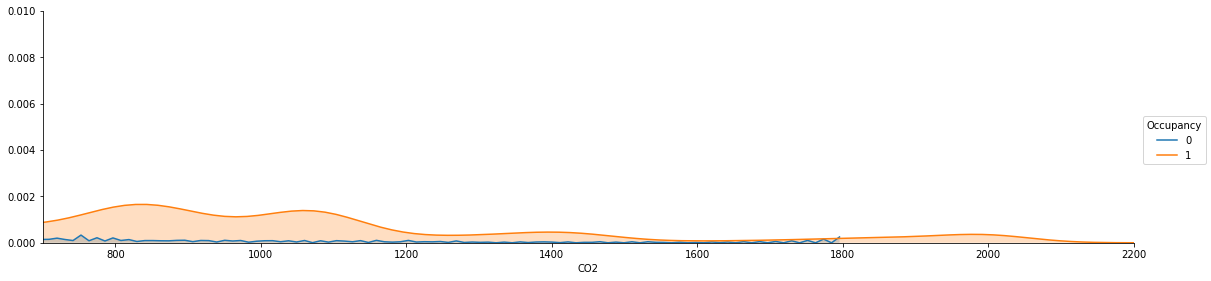

In [149]:
grid=sns.FacetGrid(train,hue='Occupancy',aspect=4,size=4)
grid.map(sns.kdeplot,'CO2',shade=True)
plt.xlim(700,2200)
plt.ylim(0,0.01)
grid.add_legend()

In [150]:
train=train[['Temperature','Humidity','Light','CO2','Occupancy']]

In [151]:
train.index=range(len(train))

In [152]:
train.head()

,Temperature,Humidity,Light,CO2,Occupancy
0,23.18,27.2720,426.0,721.25,1
1,23.15,27.2675,429.5,714.00,1
2,23.15,27.2450,426.0,713.50,1
3,23.15,27.2000,426.0,708.25,1
4,23.10,27.2000,426.0,704.50,1


Done With Feature Engineering

Applying the KNN Algorithm with Randomly Chosen K Values

So KNN is Best Applied For K=2

Let us Apply the above logic with no feature Scaling at all

In [153]:
train=pd.read_csv('datatraining.txt',sep=',')

In [154]:
train=train[['Temperature','Humidity','Light','CO2','Occupancy']]

[0.94596433392621115, 0.95456685725266088, 0.95419408626639302, 0.95481120087123761, 0.96082648553682903, 0.9603364413017369, 0.95898343259219809, 0.95947649118341616, 0.96180913615409802, 0.96352933897587878, 0.96561718886057279, 0.96254683983658695, 0.96856559180897572, 0.96684644377080919]


Text(0,0.5,'Cross-Validated Accuracy')

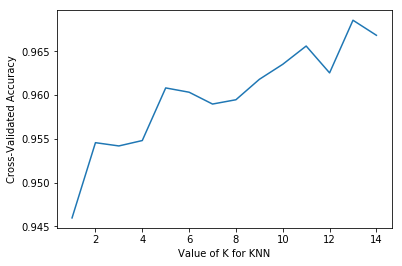

In [155]:
X=train.drop(['Occupancy'],axis=1)
y=train['Occupancy']
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
k_range = list(range(1,15))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

So K=13 is best

In [156]:
knn = KNeighborsClassifier(n_neighbors=13)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.968565591809


Now Working on the Test Datasets

In [157]:
test=test[['Temperature','Humidity','Light','CO2','Occupancy']]
X=test.drop(['Occupancy'],axis=1)
y=test['Occupancy']
knn = KNeighborsClassifier(n_neighbors=13)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.95544559033


In [158]:
test2=test2[['Temperature','Humidity','Light','CO2','Occupancy']]
X=test2.drop(['Occupancy'],axis=1)
y=test2['Occupancy']
knn = KNeighborsClassifier(n_neighbors=13)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.986676229292


Thanks